<a href="https://colab.research.google.com/github/Nsad9579/ASORS/blob/main/SIMILAR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Smilarity Project
find the Cheater ☝⏱

For this project, I compare my answers to one of my classmates' answers to a 3-question exam.

## Import packages

In [ ]:
!pip install nltk
!pip install hazm
!pip install sentence_transformers
!pip install transformers
!pip install handcalcs
!pip install stopwords_guilannlp

In [20]:
from string import punctuation
import torch
import re
import pandas as pd
from keras.utils.np_utils import to_categorical
from transformers import AutoConfig, AutoModel , AutoTokenizer
from keras.callbacks import EarlyStopping
from keras.layers import Dropout
from sklearn.metrics import classification_report, confusion_matrix
from hazm import *
from stopwords_guilannlp import *
from nltk.tokenize import RegexpTokenizer
import numpy as np
import math
import handcalcs.render
from mpl_toolkits.axes_grid1 import make_axes_locatable
from copy import deepcopy
from string import punctuation
import random

## Data

In [10]:
with open('/content/NS_Q1.txt') as f:
    NS_Q1 = f.read()
with open('/content/AA_Q1.txt') as l:
    AA_Q1 = l.read()
with open('/content/NS_Q2.txt') as f:
    NS_Q2 = f.read()
with open('/content/AA_Q2.txt') as l:
    AA_Q2 = l.read()
with open('/content/NS_Q3.txt') as f:
    NS_Q3 = f.read()
with open('/content/AA_Q3.txt') as l:
    AA_Q3 = l.read()

## Preprocessing

In [11]:
lemmatizer = Lemmatizer()
stemmer = Stemmer()
stopwords = stopwords_output("Persian", "nar")

def preprocessing(text):
    
    text = re.sub('<[^<]+?>','', text)
    text = re.sub('[a-zA-Z0-9]','', text)
    text = ''.join(c for c in text if not c.isdigit())
    text = ''.join(c for c in text if c not in punctuation)
    text = ' '.join(stemmer.stem(word) for word in text.split() if word not in stopwords) # remove stopwors from text
    text = ' '.join(lemmatizer.lemmatize(word) for word in text.split())
    return text


In [12]:
A1sent=preprocessing(NS_Q1)
B1sent=preprocessing(AA_Q1)
A2sent=preprocessing(NS_Q2)
B2sent=preprocessing(AA_Q2)
A3sent=preprocessing(NS_Q3)
B3sent=preprocessing(AA_Q3)

## Word embedding

I used ParsBert for this part.

In [ ]:
config = AutoConfig.from_pretrained("HooshvareLab/bert-base-parsbert-uncased")
tokenizer = AutoTokenizer.from_pretrained("HooshvareLab/bert-base-parsbert-uncased")
model = AutoModel.from_pretrained("HooshvareLab/bert-base-parsbert-uncased")

## Calculating the similarity
for each question, I calculated the similarity between my answer and my classmate's answer with two different methods **cosine similarity** and **eucleadian distance** .


 **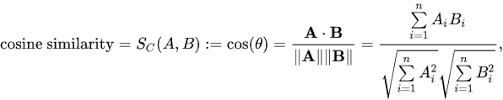




In [21]:
A1input_ids=torch.tensor(tokenizer.encode(A1sent)).unsqueeze(0)
B1input_ids=torch.tensor(tokenizer.encode(B1sent)).unsqueeze(0)
A2input_ids=torch.tensor(tokenizer.encode(A2sent)).unsqueeze(0)
B2input_ids=torch.tensor(tokenizer.encode(B2sent)).unsqueeze(0)
A3input_ids=torch.tensor(tokenizer.encode(A3sent)).unsqueeze(0)
B3input_ids=torch.tensor(tokenizer.encode(B3sent)).unsqueeze(0)

In [22]:
A1outputs=model(A1input_ids)
A1=A1outputs['pooler_output']
B1outputs=model(B1input_ids)
B1=B1outputs['pooler_output']
A2outputs=model(A2input_ids)
A2=A2outputs['pooler_output']
B2outputs=model(B2input_ids)
B2=B2outputs['pooler_output']
A3outputs=model(A3input_ids)
A3=A3outputs['pooler_output']
B3outputs=model(B3input_ids)
B3=B3outputs['pooler_output']

### Using Cosine Similarity

In [23]:
cosine=torch.nn.CosineSimilarity(dim=1)
output1 = cosine(A1, B1)
output2 = cosine(A2, B2)
output3 = cosine(A3, B3)
print("Cosine Similarity for Question 1 :",output1 ,'\n' 
      ,"Cosine Similarity for Question 2:",output2 ,'\n' 
      , "Cosine Similarity for Question 3:",output3 )

Cosine Similarity for Question 1 : tensor([0.8882], grad_fn=<SumBackward1>) 
 Cosine Similarity for Question 2: tensor([0.9548], grad_fn=<SumBackward1>) 
 Cosine Similarity for Question 3: tensor([0.8363], grad_fn=<SumBackward1>)


### Euclidean Distance

In [24]:
ED1=torch.sqrt(torch.sum(torch.pow(torch.sub(A1, B1), 2)))
ED2=torch.sqrt(torch.sum(torch.pow(torch.sub(A2, B2), 2)))
ED3=torch.sqrt(torch.sum(torch.pow(torch.sub(A3, B3), 2)))
print("Euclidean Distance for Question 1 :",ED1 , '\n' 
      ,"Euclidean Distance for Question 2:", ED2,'\n' 
      , "Euclidean Distance for Question 3:",ED3 )

Euclidean Distance for Question 1 : tensor(7.5726, grad_fn=<SqrtBackward0>) 
 Euclidean Distance for Question 2: tensor(4.9284, grad_fn=<SqrtBackward0>) 
 Euclidean Distance for Question 3: tensor(8.7377, grad_fn=<SqrtBackward0>)
